# Week 10, notes

## SIA as a diffusion equation

Diffusion of heat leads to 

$$
\frac{\partial T}{\partial t} = S + \frac{\partial^2 T}{\partial x^2}.
$$

The second derivation on the right causes this equation to smooth out variability in $T$: places with locally high $T$ have negative curvature, so $\frac{\partial T}{\partial t}>0$ and the local high temperature decreases. This comes about from the fact that heat flows from warm places to cool places. In this case the rate at which it flows is linearly proportional to the temperature gradient, so it is a linear diffusion equation.



The SIA model that we derived last week, 

$$
\frac{\partial H}{\partial t} = a - \frac{\partial q}{\partial x},
$$

$$
q = -\frac{2A}{n+2} \left(\rho g  \right)^n  H^{n+2}  \left(\frac{\partial H}{\partial x}\right)^n
$$

can be thought of as a nonlinear diffusion equation if we combine the two equations:

$$
\frac{\partial H}{\partial t} = a + \frac{2A}{n+2} \left(\rho g  \right)^n  \frac{\partial }{\partial x} H^{n+2}  \left(\frac{\partial H}{\partial x}\right)^n
$$


## Numerical solution to the equations. 
The cell below solves the SIA model 

$$
\frac{\partial H}{\partial t} = a - \frac{\partial q}{\partial x},
$$

$$
q = -\frac{2A}{n+2} \left(\rho g  \right)^n  H^{n+2}  \left(\frac{\partial H}{\partial x}\right)^n
$$

using a simple finite-difference scheme. It approximates the derivatives as differences, i.e.

$$
\frac{\partial H}{\partial t} = \frac{H^{j+1}-H^{j}}{\delta t}
$$

where $j$ refers to which 'timestep' we are looking at and $\delta t$ is the time interval between timesteps. 

Applying this approximation also to the spacial derivatives, and substituting them into our model gives

$$
\frac{H^{j+1}-H^{j}}{\delta t} = a_i - \frac{\partial q^j_{i+1} - q^j_{i-1}}{2 \delta x},
$$


$$
q^j_i = -\frac{2A}{n+2} \left(\rho g  \right)^n  {H^j_i}^{n+2}  \left(\frac{H^j_{i+1} - H^j_{i-1}}{2\delta x}\right)^n
$$

where $i$ denotes the grid cell. 

We impose the surface mass balance (SMB) as a simple linear function of distance:

$$
a = 10^{-4}\left(\frac{X}{3}-x\right), 
$$

where $X$ is the length of the spatial domain. 

We will also impose a no-flow boundary condition on the right hand side, by fixing the gradient of $H$ to be zero:

$$
\frac{\partial H}{\partial x}\bigg| _{x=0} = 0.
$$


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Solving the SIA with a spatially-fixed surface mass balance.

# 1. descritize time
dt = 0.004   # units [years]
T = 5000
t = np.arange(0,T,dt)
Lt = len(t)

# 2. descritize space
dx = 200   # units [m]
X = 40000
x = np.arange(0,X,dx)
Lx = len(x)

# create staggered grid for evaluating flux
x_stag = x[0:-1] + 0.5*dx

# 3. define physical constants
n = 3   # Glen's flow law exponent
A = 24*10**(-25) *(365*24*60*60)   # Glen's flow law parameter original value from Cuffey and Paterson 24e-25
rho = 1000   # ice density
g = 10       # acceleration due to gravity

# bed elevation
# w = 5000
# xp = X/2
# hp = 400
# zb = x*0 + hp*np.exp(-(x-xp)**2/(2*w**2))
# plt.plot(x,zb,'.')
# zb = 1500*(-np.tanh(20*(x-0.75*X)/X))

# 3. numerical constant
e = 0.0001    # used to prevent ice thickness from going to zero, when our model does not apply.

# 4. initial conditions
H = np.zeros((Lt,Lx))

L = X/2
H0 = 1000
H[0,:] = np.maximum(e,H0 - H0*(2*x/L)**2)    # an arbitrary function that obeys our boundary condition (dh/dx = 0 at x = 0)
H_new = np.zeros((Lx))

# 5. surface mass balance
ELx = X/3
a = 1*10**(-4) * (X/3-x)

print_period = 50000

print('starting main loop')
# 6. Main loop (evolves the thickness H forward in time)
for i, timestep in enumerate(t):  
    
    if i % print_period == 0:    
        print(f'{timestep} years out of {T} years.')

    # save old thickness vector
    H_old  = H[i-1,:]

    # evaluate H on the staggered grid
    H_stag = (H_old[1:] + H_old[0:-1])/2
 
    # evaluate surface slope on the staggered grid.
    alpha = -(H_old[1:] - H_old[0:-1])/dx # on staggered grid

    # evaluate flux on the staggered grid
    q = 2*A/(n+2) * (rho*g*  alpha)**n * H_stag**(n+2)   # on staggered grid

    # compute the ice thickness using the finite-difference form of the
    # mass conservation equation. 

    H_new[1:-1] = np.maximum(e,H_old[1:-1] + dt * ( a[1:-1] - (q[1:]-q[0:-1])/dx ))    
    
    # apply the boundary conditions at x = 0 and x = X
    H_new[0] = H_new[1]
    H_new[-1] = e
    
    # save new thickness vector
    H[i,:] = H_new



starting main loop
0.0 years out of 5000 years.
200.0 years out of 5000 years.
400.0 years out of 5000 years.
600.0 years out of 5000 years.
800.0 years out of 5000 years.
1000.0 years out of 5000 years.
1200.0 years out of 5000 years.
1400.0 years out of 5000 years.
1600.0 years out of 5000 years.
1800.0 years out of 5000 years.
2000.0 years out of 5000 years.
2200.0 years out of 5000 years.
2400.0 years out of 5000 years.
2600.0 years out of 5000 years.
2800.0 years out of 5000 years.
3000.0 years out of 5000 years.
3200.0 years out of 5000 years.
3400.0 years out of 5000 years.
3600.0 years out of 5000 years.
3800.0 years out of 5000 years.
4000.0 years out of 5000 years.
4200.0 years out of 5000 years.
4400.0 years out of 5000 years.
4600.0 years out of 5000 years.
4800.0 years out of 5000 years.


### Plot the result
This cell plots the thickness profile $H(x)$ from every 10,000th timestep. We see that the glacier grows from the initial conditions of $H(t=0,x) = 0$ and advances until we get the characteristic convex shape that we have talked about in previous classes, caused by the interplay of thinning towards the terminus, the dependence of flux on thickness and the spatial variability of flux. 

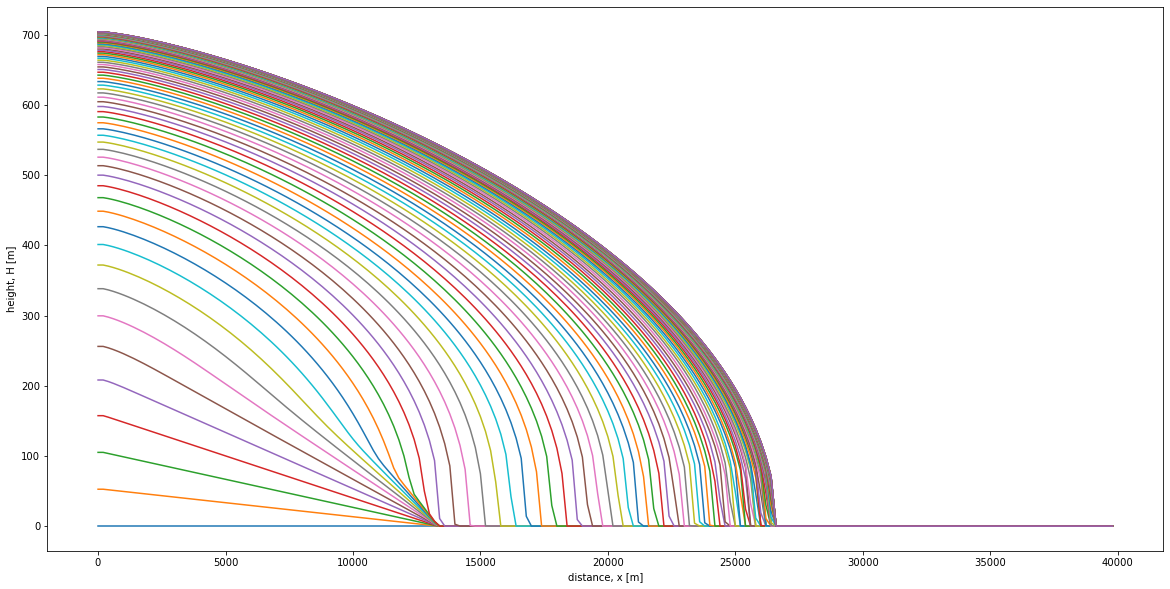

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(x,np.transpose(H[0:-1:10000,:]));
plt.xlabel('distance, x [m]')
plt.ylabel('height, H [m]')
plt.show()


### Spatial variability of flux
To understand the shape of $H$ in a steady state, we also need to understand the shape pf $q$ and to understand that, let's first plot the SMB $a$: 

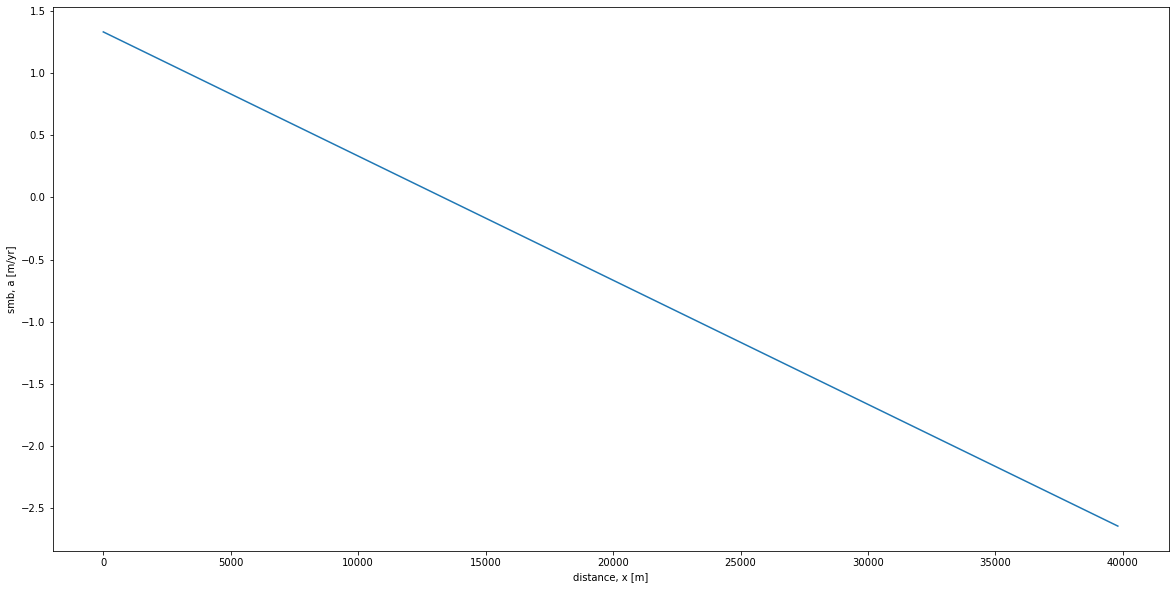

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(x,a);
plt.xlabel('distance, x [m]')
plt.ylabel('smb, a [m/yr]')
plt.show()

We just imposed this function in the model. It says that SMB is positive one left of our model domain and decreases linearly with $x$, passing zero at $x=1500$ m. This is probably not how SMB really works; SMB is more likely to be a function of elevation ($a(H)$) rather than distance($a(x)$), but with a flat bed like this, $a(H)$ leads to unstable ice sheet growth or decay, so the only steady state we can reach is $H(x) = 0$, which isn't very interesting. So we stick with this unrealistic way of imposing SMB for now and we can always come back to this later and look at what happens when it is prescribed in a more realistic way. 

From the mass balance equation we know that in a steady state

$$
\frac{\partial q}{\partial x} = a.
$$

We also can reason that, because we imposed $\frac{\partial H}{\partial x} = 0$ at the left hand domain, $q(0) = 0$. Therefore, we can predict that, starting from $x=0$, $q$ must increase with $x$ (where $a$ >0), then reach a maximum (where $a=0), and then decrease (where $a<0). The maximum $q$ is at the equilibrium line! 

Plotting $q$ from the last timestep shows just this:


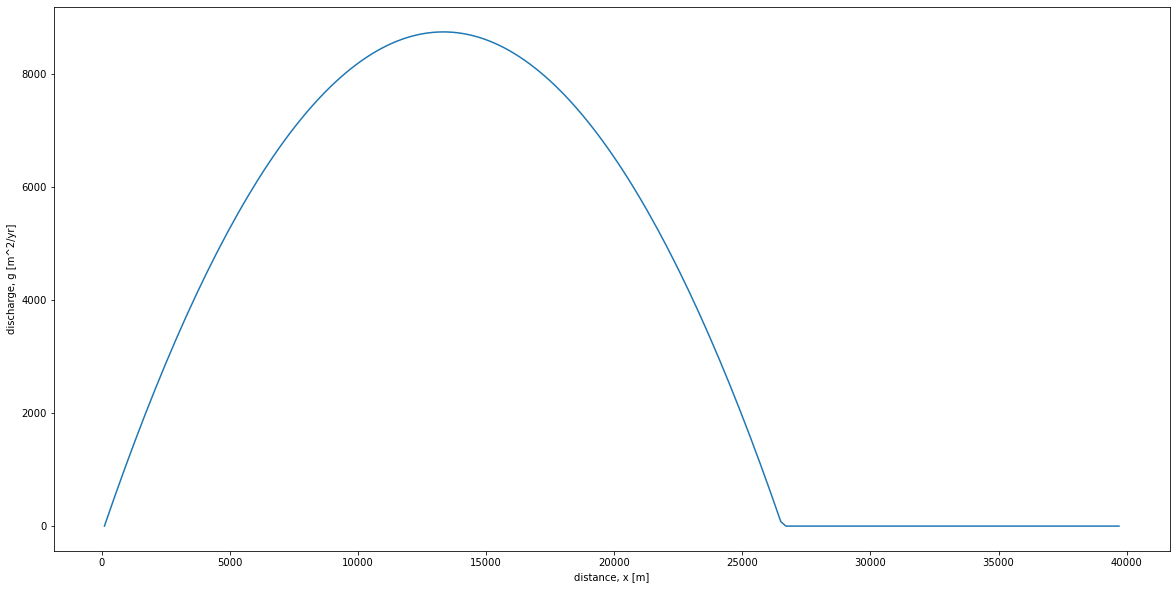

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(x_stag,q);
plt.xlabel('distance, x [m]')
plt.ylabel('discharge, g [m^2/yr]')
plt.show()

### This $q$ controls $h$
As discussed, mass balance dictates how $q$ varies with $x$. This controls $H$. The thickness has to decrease with $x$ becuase it is flowing from left to right, and so the slope has to increase with $x$ to compensate for this. This can be seen by plotting out the two parts of the flux expression which depend on $H$ and its gradient: $(\partial H/\partial x)^{n}$ and $H^{n+2}$:

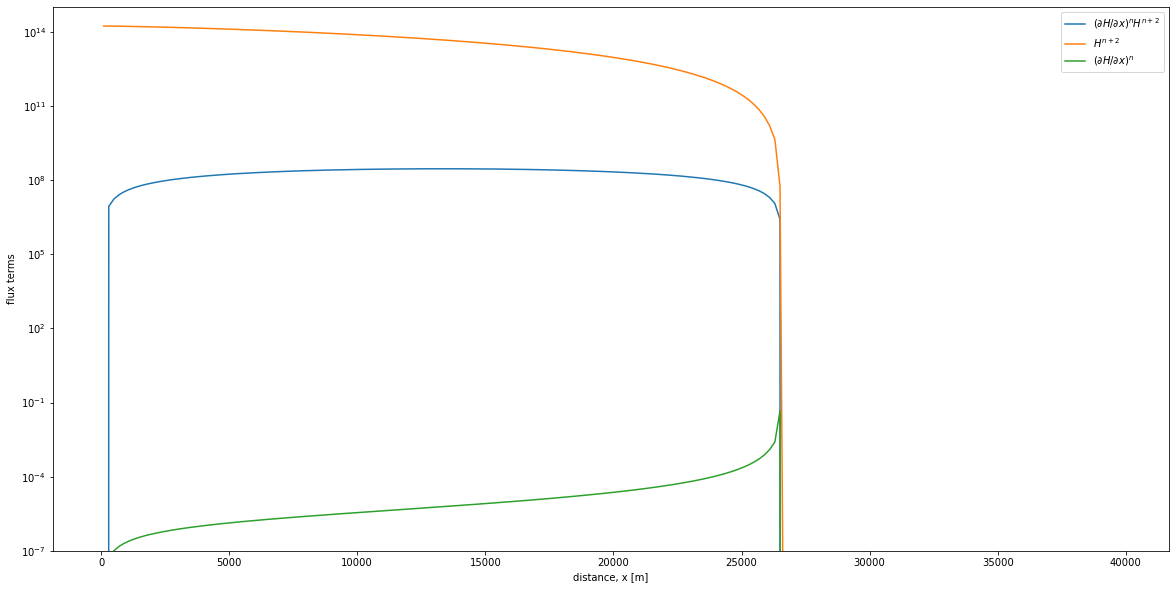

In [27]:
plt.figure(figsize=(20, 10))
plt.semilogy(x_stag,alpha**n * H_stag**(n+2), label = '$(\partial H/\partial x)^{n} H^{n+2}$');
plt.semilogy(x_stag,H_stag**(n+2), label = '$H^{n+2}$');
plt.semilogy(x_stag,alpha**n, label = '$(\partial H/\partial x)^{n}$');
plt.xlabel('distance, x [m]')
plt.ylabel('flux terms')
plt.ylim((10**(-7),10**(15)))
plt.legend()
plt.show()


The slope part of the expression is very small and increases with $x$. The thickness part of the expression is very large and decreases with $x$. Their product gives us the required shape of $q$ (note that the log scale makes the resolution of the model very obvious, particularly at $x=0 and at the terminus where $q=0$).

### Horizontal velocity
Finally, we can consider how the horizontal velocity $u$ varies with $x$. We can compute $u$ using the thickness and the flux as $u=q/H$. Plotting this (below) shows that is peaks slightly downstream of the equilibrium line. This is because $H$ decreases downstream, so at the equilibrium line, though the flux is at a maximum, the ice to the right of the equilibrium line is moving slightly faster because despite lower $q$ it has higher $H$ which tends to increase $u$. 

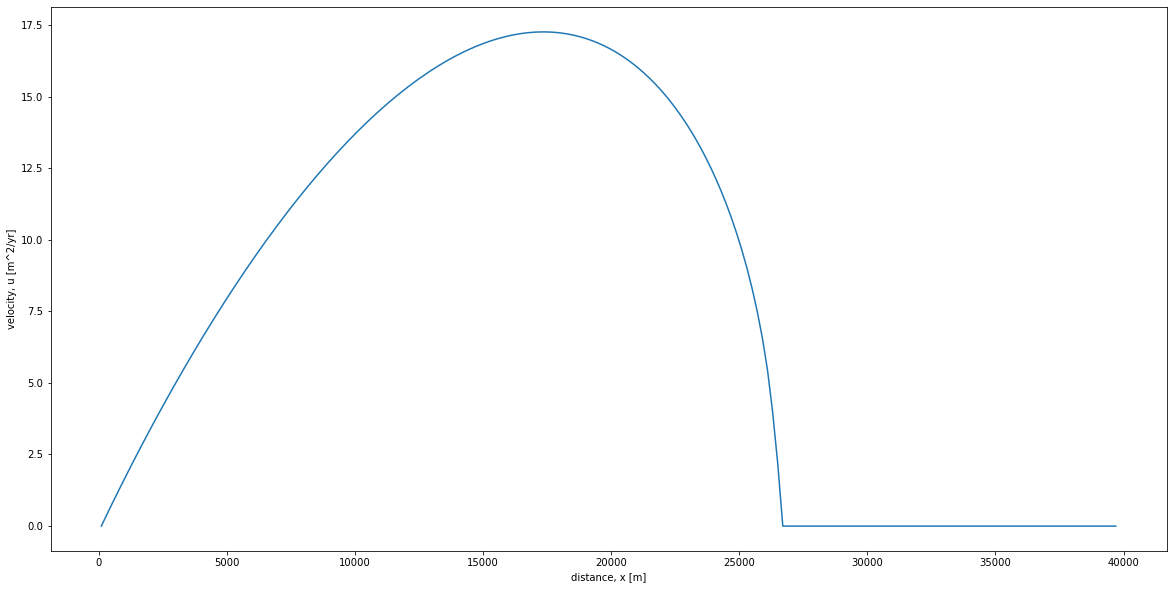

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(x_stag,q/H_stag);
plt.xlabel('distance, x [m]')
plt.ylabel('velocity, u [m^2/yr]')
plt.show()

## Vertical velocity

If the horizontal velocity is given by

$$
u(\zeta)=  -\frac{2A}{n+1} \left(\rho g  \right)^n  H^{n+1}  \left(\frac{\partial H}{\partial x}\right)^n \left( 1- \zeta^{n+1} \right).
$$

Mass balance,


$$
\frac{\partial u}{\partial x} = \frac{\partial w}{\partial \zeta},
$$

can be used to get an expression for the vertical velocity, assuming zero velocity at the bed:

$$
w = w_s*\left(1 - \frac{n+2}{n+1}  \zeta + \frac{1}{n+1} \zeta^{n+2}\right),
$$

where $w_s$ is the vertical velocity at the surface. 

The code below evaluates this expression for different values of $n$. 




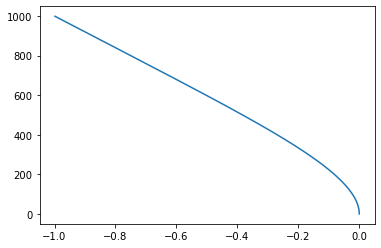

In [11]:
w_s = 1

n = 3.0
H = 1000
z = np.arange(0,H)

zeta = 1-z/H
w = -w_s*(1 - (n+2)/(n+1) * zeta + 1/(n+1)* zeta**(n+2))

plt.plot(w,z);